# Plot MIMO OFDM Communication simulations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
import json

import project_path as pp
from cissir import visualization as viz
viz.paper_style()

base_path = pp.module_path
plot_path = base_path/"plots"
res_path = base_path/"results"

In [2]:
with open(res_path/"bler.json", 'r', encoding ='utf8') as json_file:
    DL_SIMS = json.load(json_file)

Simulation duration: 0.12 [h]


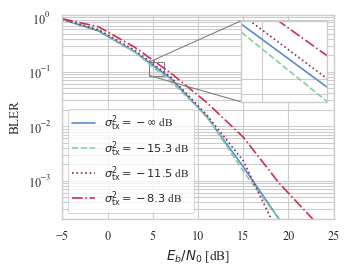

In [3]:
print("Simulation duration: {:1.2f} [h]".format(DL_SIMS["duration"]/3600))

fig, ax = plt.subplots()
axins = zoomed_inset_axes(ax, zoom=6, loc='upper right')

ax.set_xlabel(r"$E_b/N_0$ [dB]")
ax.set_ylabel("BLER")
ax.grid(which="both")
axins.grid(which="both")

#ax.set_title("8x2 MIMO Downlink - CSI feedback w.r.t. original codebook\n2 streams, 4 Tx chains")

ax.set_xlim([-5, 25])
ax.set_ylim([2e-4, 1.1])
legend = [r"$\sigma_{\mathrm{tx}}^2=-\infty$ dB",
          r"$\sigma_{\mathrm{tx}}^2=" + f"-15.3$ dB",
          r"$\sigma_{\mathrm{tx}}^2=" + f"-11.5$ dB",
          r"$\sigma_{\mathrm{tx}}^2=" + f"-8.3$ dB"]
for i, bler in enumerate(DL_SIMS["bler"]):
    axins.semilogy(DL_SIMS["ebno_db"], bler)
    ax.semilogy(DL_SIMS["ebno_db"], bler)

ax.legend(legend, fontsize="8.1")
ax.grid()
axins.grid()

axins.set_xlim(4.6,6.2)
axins.set_ylim(8.5e-2,1.5e-1)
axins.xaxis.set_ticks([5], [None])
axins.yaxis.set_ticks([])
axins.set_yticks([9e-2, 1e-1], 2*[None], minor=True)
_ = mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

plt.savefig(plot_path/"bler_dft_precode.pdf", bbox_inches="tight")